# Standardized Testing in the US
## Spring 2024 Data Science Project


Christopher Lim: 100\
Jimin Yoon: 100\
Benjamin Jordan: 100

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."\
\
Christopher Lim 5/7/2024\
Jimin Yoon 5/7/2024\
Benjamin Jordan 5/7/2024

Chistopher Lim:\
Contributed primarily with his application of the different methods used for this project. Provided suggestions on the types of summary statistics and algorithms to use based on the attributes of the dataset which were used for this project.\
\
Jimin Yoon:\
Contributed primarily with revisions and polish on the implemention of the project. Provided suggestions on how to improve the implementation to be more focused towards the goals of the project and contextualized them for the audience.\
\
Benjamin Jordan:\
Contributed primarily with the implementation and coordination of the project. Was able to organize the group to enable steady progress of the project and helped to implement the code.

# **Introduction**
Collaborators: Benjamin Jordan, Jimin Yoon, Christopher Lim

This project is an analysis of standardized testing scores across different demographics, years, and subjects. Standardized testing plays a large role in the American education system's evaluation of students performance. Throughout this project we will utilize data from *The Educational Opportunity Project at Stanford University* to identify trends and quantify how different features effect student's performance. The two main questions are what features/statistics have the most bearing on student's success, and what changes occur when we examine different demographics? By solving these questions we can better understand the trends and have an answer for why some students are performing better or worse than average.

We will conduct our analysis in multiple steps. Beginning with data curation and subsequent cleaning/pre processing along with exploratory data analysis where we will be testing different hypothesis with labeled visualizations. Then we conduct some feature engineering to apply different machine learning techniques to draw further conclusions about trends in the data and make predictions. Finally we shall provide a conclusion incorporating all of the findings and trends.




**Data Curation**

All of our data come from *The Educational Opportunity Project at Stanford University* which can be found here: https://edopportunity.org/
The data, gathered by Standford, is a collection of different information about students along with their standardized testing scores.
In the following section we load the data in and clean it, which includes cropping out some things we do not need as well as merging dataframes and renaming different headers to ensure it is easy to interpret.


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
district_scores_df = pd.read_csv("/content/drive/MyDrive/CMSC320 Final Project Data/SEDA_district_long.csv")

In [4]:
district_covariant_df = pd.read_csv("/content/drive/MyDrive/CMSC320 Final Project Data/SEDA_district_long_cov.csv")

We merge together the data for district scores and district covariant data into a data strucutre called `district_df`

In [5]:
district_df = pd.merge(district_scores_df, district_covariant_df, how = "inner", left_on = ["sedalea", "year", "grade"], right_on = ["sedalea", "year", "grade"], suffixes = (None, "ignore"))

The data contains 151 columns with confusing names so we reformat the column names.

In [6]:
district_df.columns

Index(['fips', 'stateabb', 'sedalea', 'sedaleaname', 'subject', 'grade',
       'year', 'cs_mn_all', 'cs_mn_se_all', 'tot_asmt_all',
       ...
       'single_momasn', 'single_momblk', 'single_momhsp', 'single_momnam',
       'single_momwht', 'seswhtblk', 'seswhthsp', 'seswhtasn', 'seswhtnam',
       'urbanicity'],
      dtype='object', length=151)

In [7]:
district_df = district_df.rename(columns={"sedalea": "district_ID", "stateabb": "state", "sedaleaname": "district_name", "cs_mn_all": "avg_score", "cs_mn_se_all": "std_dev", "tot_asmt_all": "students", "cs_mn_fem": "female_score", "cs_mn_mal": "male_score"})
district_df.sample(5)

,fips,state,district_ID,district_name,subject,grade,year,avg_score,std_dev,students,...,single_momasn,single_momblk,single_momhsp,single_momnam,single_momwht,seswhtblk,seswhthsp,seswhtasn,seswhtnam,urbanicity
38114,5,AR,500016,Marmaduke School District,rla,7,2017,-0.331408,0.157957,49,...,NaN,NaN,NaN,NaN,0.153332,NaN,NaN,NaN,NaN,Rural
503898,26,MI,2617730,Harper Creek Community Schools,rla,5,2017,-0.064526,0.079878,206,...,NaN,NaN,NaN,NaN,0.146415,NaN,NaN,NaN,NaN,Rural
27219,4,AZ,404010,Joseph City Unified District (4388),mth,3,2015,-0.102686,0.205501,25,...,NaN,NaN,NaN,NaN,0.142454,NaN,NaN,NaN,NaN,Rural
824354,39,OH,3904493,Upper Arlington City,mth,7,2010,0.659574,0.050979,416,...,0.138891,NaN,0.213911,NaN,0.084118,NaN,1.343392,-0.076545,NaN,Suburb
97252,6,CA,616860,Helendale Elementary,rla,6,2012,0.018678,0.159336,49,...,NaN,NaN,NaN,NaN,0.134464,NaN,NaN,NaN,NaN,Town


Stanford has done most of the cleaning already when they preprocessed the raw data. They created a score called the cohort scale (cs) which represents the number of standard deviations above or below the average score in that year, grade, and subject. Notice also that there are many NaN columns which represent there was not enough data too obtain results. We choose not to imputate this data as it would make our results inaccurate.

We choose an alpha-value of 0.05, meaning that if a result is less than 5% likely to happen we consider it to be not random chance.

# Exploratory Data Analysis

#  Test 1: Examining the Difference In Each State
This section will be looking at the "cs_mn_all" or the combined mean from standardized testing in reading and english among all students, which we will be grouping by state.

*Null Hypothesis:* Students from all demographics, test scores are similar in every state.

*Alternative Hypothesis:* Students from all demographics, test scores are different depending on each state.

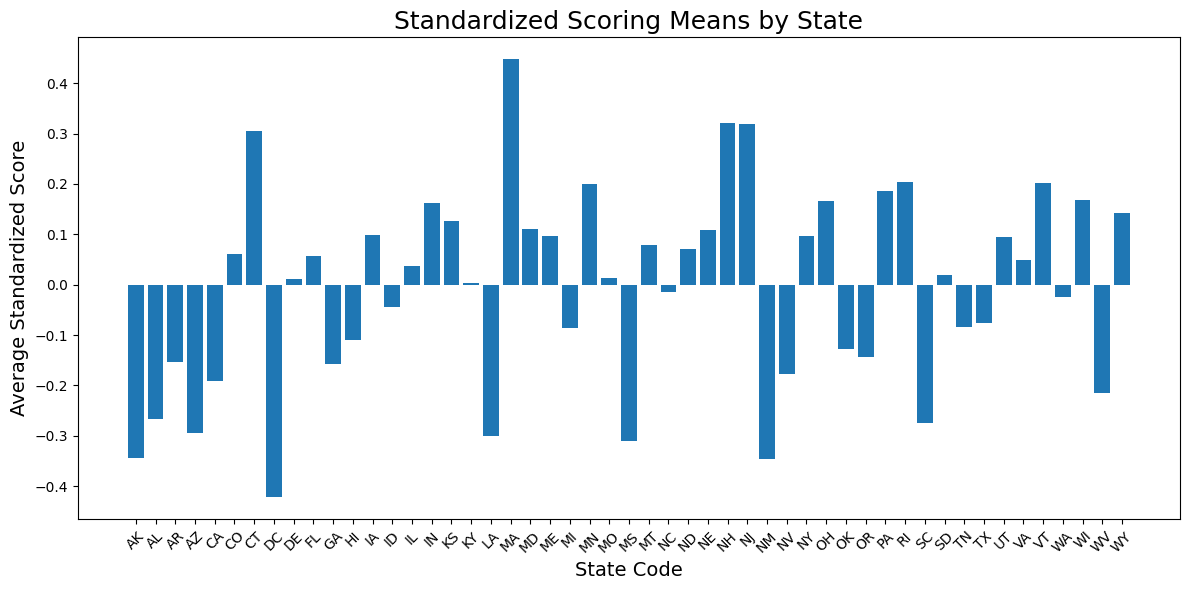

In [8]:
#grouping by state and getting the means
grouped_states = district_df.groupby('state')
means = grouped_states['avg_score'].mean()

#Creating a plot for means of each state, displayed below
plt.figure(figsize=(12,6))
bwidth = .8
plt.bar(means.index, means.values, width = bwidth)
plt.xlabel('State Code', fontsize = 14)
plt.ylabel('Average Standardized Score', fontsize = 14)
plt.title('Standardized Scoring Means by State', fontsize = 18)
plt.xticks(rotation=45)
ticks = [-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4]
plt.yticks(ticks)
plt.tight_layout()

In [9]:
#Our dataset is too large to test on every value so we are going to sample some from each state, we will be using 100 since larger values result in 0.0 as they are too low of a number to be displayed
#100 works best becasue it still gives us a value to demonstrate
state_samples = district_df.groupby('state').sample(100).groupby('state')['avg_score'].apply(list)
fStat, pVal = sp.stats.f_oneway(*state_samples)
print("Resulting p value from the ANOVA test:", pVal)

Resulting p value from the ANOVA test: 1.6942981574292177e-249


# Conclusions from this test
*Sidenote:* The dataset we are working on here is incredibly large with more than a million rows, so we sample a hundred data points from each state. Any sample larger than 100 the ANOVA (f_oneway) gives 0.0 since it cannot display a small enough value, so we will use 100.

The significantly small p-value shows that we can reject the null hypothesis, given that the p-value of 1 x 10^-294 is less than the alpha-value of 0.05. This means that students from each state are scoring very differently. If we examine the bar chart of means we can see which states are doing better or worse. A conclusion that can be drawn is that many North East states like MA, CT, NJ, and NH are scoring very well above others while some South West states like NM and AZ scored lower. Overall many northern states scored higher than southern ones. This data can be used when examining other data sets like educational spending to see if theres a relationship.

# Test 2: Performance Across Grade Level in Male vs Female Students
In this section we will be looking at the performance of students from grades 3 to 8 on standardized testing seperated by male and female.

*Null Hypothesis:* the difference in test scores between male and female 3rd to 8th graders is not signifigant.

*Alternative Hypothesis:* the difference in test scores between male and female students 3rd to 8th grade is significant.

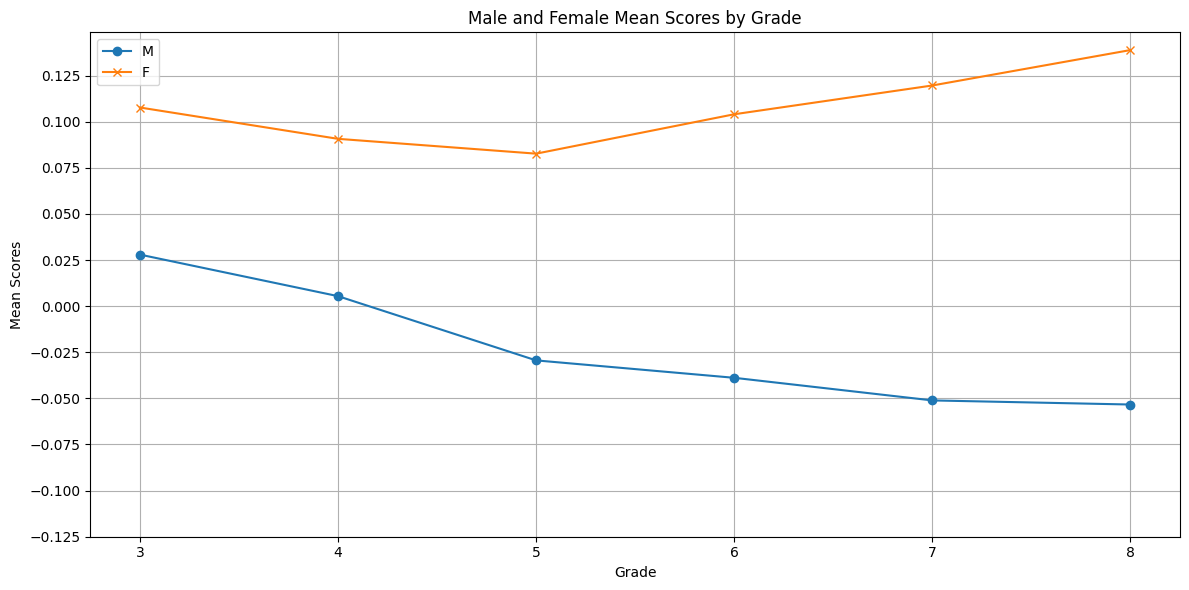

P Value from the independent t test: 8.667601542319144e-06


In [10]:
maleAllGrades = district_df[['grade', 'male_score']]
femaleAllGrades = district_df[['grade', 'female_score']]
maleGradeMeans = maleAllGrades.groupby('grade')['male_score'].mean()
femaleGradeMeans = femaleAllGrades.groupby('grade')['female_score'].mean()
plt.figure(figsize=(12,6))
plt.plot(maleGradeMeans.index, maleGradeMeans.values, marker = 'o', label = 'M')
plt.plot(femaleGradeMeans.index, femaleGradeMeans.values, marker = 'x', label = 'F')
plt.xlabel('Grade')
plt.ylabel('Mean Scores')
plt.title('Male and Female Mean Scores by Grade')
plt.xticks(maleGradeMeans.index)
ticks = [-.125, -.1, -.075, -.05, -.025, 0, .025, .05, .075, .1, .125 ]
plt.yticks(ticks)
plt.yticks()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#independent T test since we have two distinct groups we want to compare
tStat, pValue = sp.stats.ttest_ind(maleGradeMeans.values, femaleGradeMeans.values)
print("P Value from the independent t test:", pValue)

# Conclusions from this Test

As we can see from the independent t test and the line plot, there is signifigant difference between male and female scores. The p-value was
8.69...*10^-6 or 0.000008692... which is an incredibly small value. This means that we can confidently reject the null hypothesis and say that there is indeed a significant difference between male and female test scores. The female scores are much higher and begin to increase after the 5th grade scores while male's scores keep dropping the entire way.

This is very interesting information and shows a disconnect between male students and the content they are learning. The reasoning behind this difference is not something that can be determined from these statistics alone but one could theorize many reasons. Statistics like this are important because they highlight issues we may not have seen otherwise and can quantify/visualize just how severe it is. From the line plot above a reasonable person can come to the conclusion that there is a drastic difference between male/female and the gap increases as grade increases.

# Test 3: Performance Across Various Population Densities

In this section we will be looking at the difference in performance of students between the type of area they live in. First we will conduct a pearson correlation coefficient test to check for a simple linear correlation.


We assign a number to each level of urbanicity, with Rural being 1, Town being 2, Suburb being 3, and City being 4. Then we calculate the coefficient and create a scatter plot.

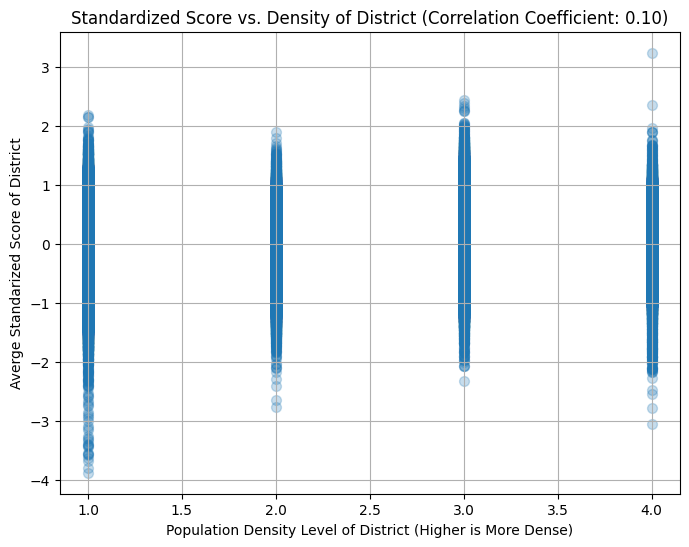

Pearson Correlation Coefficient (r): 0.09575240446357688


In [11]:
urban_dictionary = {"Rural": 1, "Town": 2, "Suburb": 3, "City": 4}
district_df["urban_level"] = district_df["urbanicity"].map(urban_dictionary)

correlation_coefficient = district_df["urban_level"].corr(district_df["avg_score"])

plt.figure(figsize=(8, 6))
plt.scatter(district_df['urban_level'], district_df['avg_score'], alpha=0.25, s = 50)
plt.xlabel('Population Density Level of District (Higher is More Dense)')
plt.ylabel('Averge Standarized Score of District')
plt.title(f'Standardized Score vs. Density of District (Correlation Coefficient: {correlation_coefficient:.2f})')
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficient (r):" , correlation_coefficient)

We notice that there is a weak correlation (coefficient is less than 0.4) between urbanicity and the average standardized score of a district. This means that score does not increase or decrease linearly as urbanicity increases. There could still be some connection between these variables so we perform more tests. The scatter plot shows that a population density level of 3 (suburb) has the highest average test score, and rural areas have a large range of scores. Many of the city scores are also potentially outliers.

ANOVA test

*Null Hypothesis:* There is no significant difference in the mean scores between districts of various area types.

*Alternative Hypothesis:* There is a significant difference between at least two of the mean scores between districts of various area types.

The data categorizes these areas as urban, suburban, town, and rural.

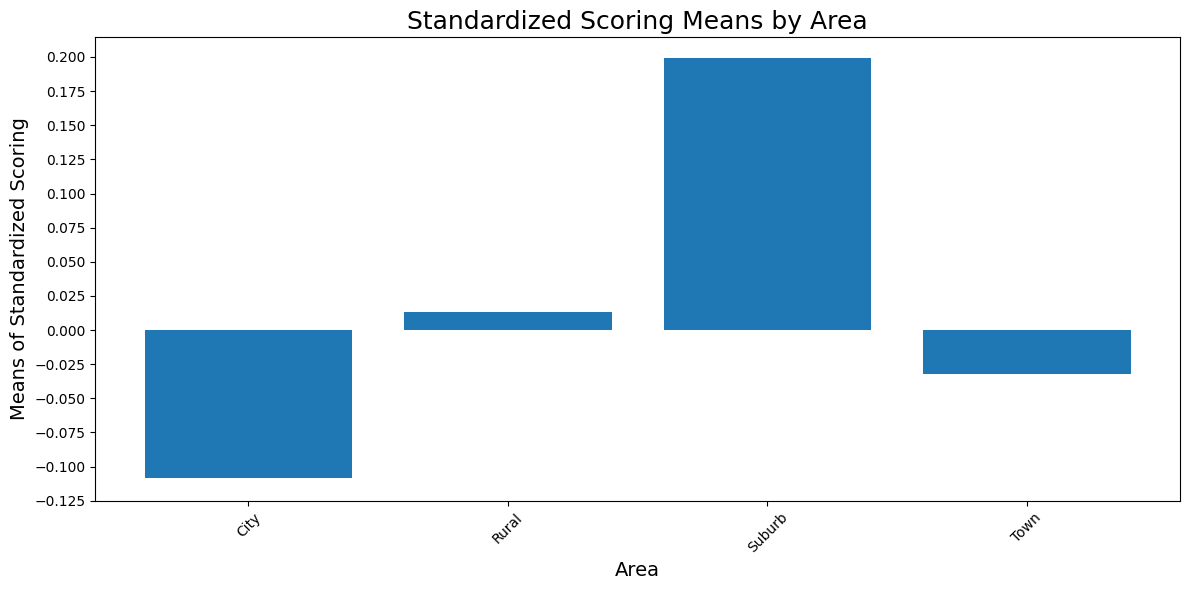

In [12]:
groupedArea = district_df.groupby('urbanicity')
areaMeans = groupedArea['avg_score'].median()

plt.figure(figsize=(12,6))
bwidth = .8
plt.bar(areaMeans.index, areaMeans.values, width = bwidth)
plt.xlabel('Area', fontsize = 14)
plt.ylabel('Means of Standardized Scoring', fontsize = 14)
plt.title('Standardized Scoring Means by Area', fontsize = 18)
plt.xticks(rotation=45)
ticks = [-.125, -.1, -.075, -.05, -.025, 0, .025, .05, .075, .1, .125,.15,.175,.2]
plt.yticks(ticks)
plt.tight_layout()


We choose to again sample a portion of the data in order to maintain an accurate p-value. We choose a sample size of 1000.

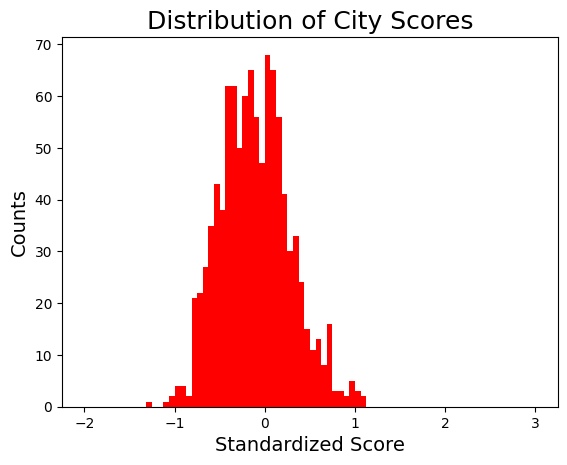

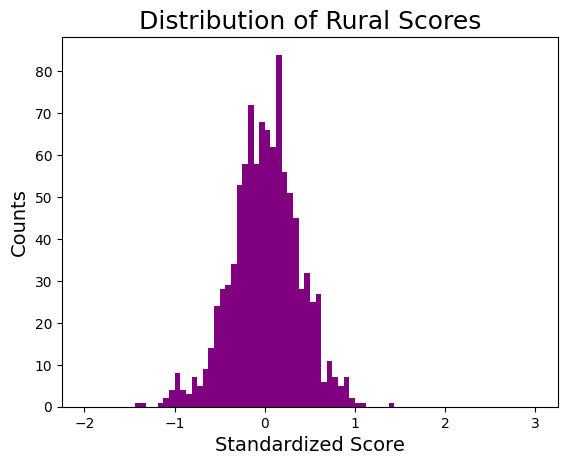

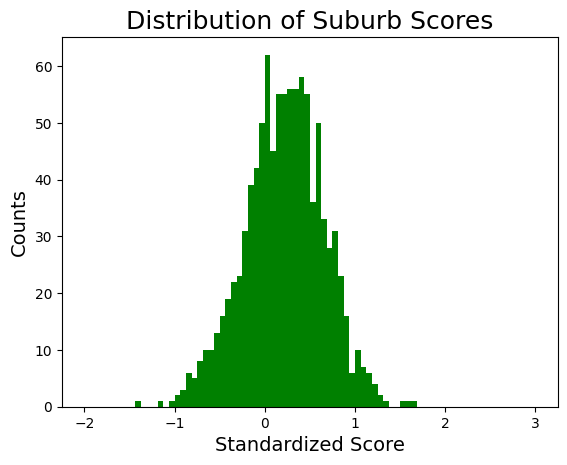

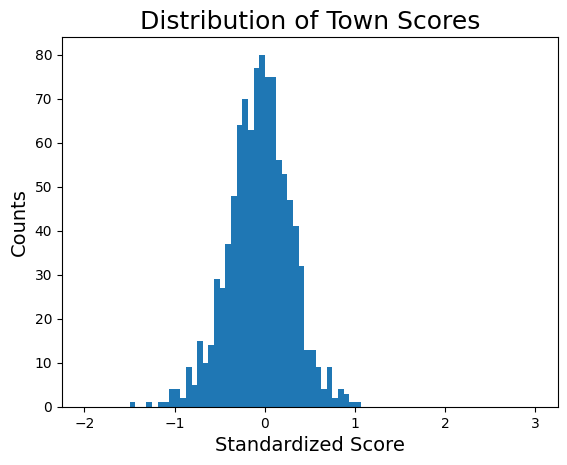

P-Value 1.1937082510448719e-81


In [13]:
city = district_df[district_df['urbanicity']=='City']['avg_score'].sample(1000)
rural = district_df[district_df['urbanicity']=='Rural']['avg_score'].sample(1000)
suburb = district_df[district_df['urbanicity']=='Suburb']['avg_score'].sample(1000)
town = district_df[district_df['urbanicity']=='Town']['avg_score'].sample(1000)


plt.hist(city,bins=80,range=[-2,3],color='red')
plt.xlabel('Standardized Score', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distribution of City Scores', fontsize = 18)
plt.show()

plt.hist(rural,bins=80,range=[-2,3],color='purple')
plt.xlabel('Standardized Score', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distribution of Rural Scores', fontsize = 18)
plt.show()

plt.hist(suburb,bins=80,range=[-2,3],color='green')
plt.xlabel('Standardized Score', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distribution of Suburb Scores', fontsize = 18)
plt.show()

plt.hist(town,bins=80,range=[-2,3])
plt.xlabel('Standardized Score', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distribution of Town Scores', fontsize = 18)
plt.show()

# Each distribution is approx. normally distributed,

f_statistic, p_value = sp.stats.f_oneway(city,rural,suburb,town)

print("P-Value", p_value)


The p-Value from this ANOVA test is 2.29 x 10^-62 which is less than the alpha-value of 0.05. This means that we can confidently reject the null hypothesis and say that there is indeed a significant difference in tests scores by area at 0.05 significance.

We can take a glimpse of this difference with the means of standardized scores. Suburban has the highest mean while city has the lowest mean. There is a belief that rural areas should have the lowest means as they tend to have lower funding due to the poor economic situation and low population of those areas. We can inspect this more closely with a box plot.

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.114     0.000    -0.158    -0.069
 (0 - 2)     -0.049     0.025    -0.094    -0.004
 (0 - 3)     -0.321     0.000    -0.366    -0.276
 (1 - 0)      0.114     0.000     0.069     0.158
 (1 - 2)      0.065     0.001     0.020     0.109
 (1 - 3)     -0.207     0.000    -0.252    -0.163
 (2 - 0)      0.049     0.025     0.004     0.094
 (2 - 1)     -0.065     0.001    -0.109    -0.020
 (2 - 3)     -0.272     0.000    -0.317    -0.227
 (3 - 0)      0.321     0.000     0.276     0.366
 (3 - 1)      0.207     0.000     0.163     0.252
 (3 - 2)      0.272     0.000     0.227     0.317



Text(0, 0.5, 'standard score')

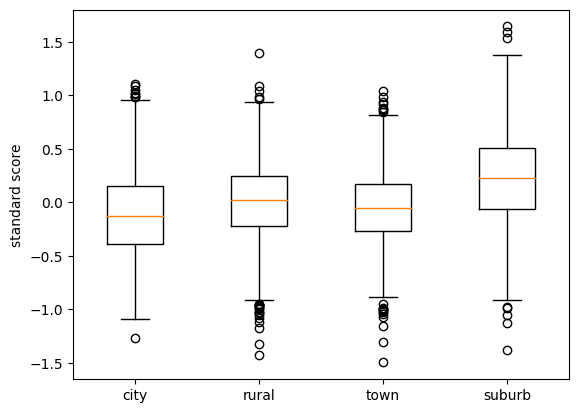

In [14]:
res = sp.stats.tukey_hsd(city,rural,town,suburb)
print(res)

fig, ax = plt.subplots(1, 1)
ax.boxplot([city, rural, town,suburb])
ax.set_xticklabels(["city", "rural", "town","suburb"])
ax.set_ylabel("standard score")


Here with a Tukey HSD that every group is significantly different from each other except for rural and town. This makes sense as each area has their unique circumstances which influences test scores. While the differences might seem minute these points are normalized which may affect the perception of the reader. One interesting observation is that the city has the largest range among the areas. An explanation for this may be that cities are more densely populated so there are many more types of people and circumstances for test takers.

## Conclusions From Exploratory Data Analysis

The data that we are working with here is based upon standardized test scores across different locations and demographics. This information is split across categories like state, district, and environment like city/suburb as well as gender and race. We focused mainly on analyzing data from these different regions and checked correlation with factors like population density. From the different tests we used like the ANOVA test and correlation coefficents we can conclude that aspects like state, environment, and population density affect the resulting scores. What we can take away from this is that throughout the country, despite the pretty standard education students should be receiving, their scores are very diverse indicating that student environment and location plays a significant role in their scoring. As mentioned earlier the focus was on location and environment but we did observe some other sigificant factors like gender. From an Independent t-test we can observe that male and female scores are very different. Female students mostly increase in average over grade level and overall scoring higher than male students who were decreasing as grade level increased.

Some of the trends that can be observed:
*   Generally, more northern states, especially the North East, scored higher than the southern states.
*   Those who live in the suburbs scored highest, followed by rural, then town which were pretty close, lastly cities scored the lowest.
*   When examining the environments of suburb, urban, town, and rural all areas have a lot of outliers who scored either very high or very low on the tests.
*  Female student's scores were significantly higher than male students.
*  Male students scores from 3rd to 8th grade got worse as the grade increased, meaning older male students performed worse on their tests than the younger ones.
*   On the contrary female student's scores decreased up until 5th grade after which they increased as the grade increased

For our next steps, we would like to zoom in on the most drastic trends, such as highest performing states and lowest performing states, to analyze potential factors in their success or failures. So far we understand the general trends of our data which largely reinforces pre-existing research on the education system. Further incorporating conditions and combining these attributes may help us predict the combination of factors which determine student success. This testing will largely include further parametric tests where we compare each sub-sample to other samples (2-sample t-test). We can also potentially use ML to predict student success based on the factors that we have deemed significant. We would like to use a regression-based or similar machine learning technique in order to predict test scores based on these cofounding variables. This is because we have a continous dependent variable which is test scores. In our exploratory analysis we noticed that factors such as location, urbanicity, and gender influence the average score. This means that we could build a regression model which takes into account these variables and produces a test score. We could then investigate what has the greatest influence on test scores, and what possible biases there are. We could also consider a clustering machine learning method to investigate what groups are more successful than others and why.    





# Primary Analysis

## Plotting Line of Best Fit

Linear Regression Mean Squared Error: 0.12533685734542516


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


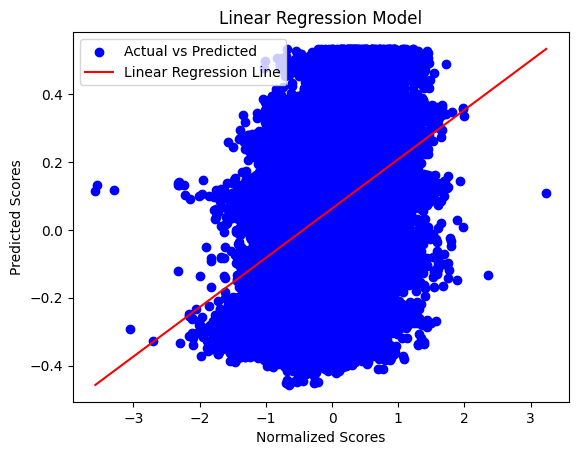

Random Forest Mean Squared Error: 0.14810982145017068


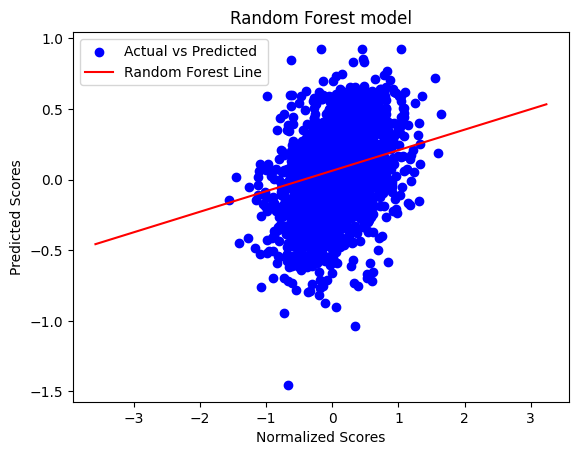

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Feature engineering the data with one hot encoding
lr_df = district_df[['avg_score', 'urbanicity', 'state', 'year','grade']]
lr_df = pd.get_dummies(lr_df, columns=['urbanicity', 'state', 'year'])
X = lr_df.drop(columns=['avg_score'])
y = lr_df['avg_score']
#perform standard multiple linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Plotting
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='-', label='Linear Regression Line')
plt.xlabel('Normalized Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

#Performing random forest with a subset of the data
subset_size = 15000
random_indices = np.random.choice(len(X), size=subset_size, replace=False)
X_subset = X.iloc[random_indices]
y_subset = y.iloc[random_indices]
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_subset, y_train_subset)
rf_y_pred_subset = rf_model.predict(X_test_subset)
rf_mse_subset = mean_squared_error(y_test_subset, rf_y_pred_subset)
print("Random Forest Mean Squared Error:", rf_mse_subset)

#plotting
plt.scatter(y_test_subset, rf_y_pred_subset, color='blue', label='Actual vs Predicted')
y_min_subset = min(y_test_subset.min(), rf_y_pred_subset.min())
y_max_subset = max(y_test_subset.max(), rf_y_pred_subset.max())
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='-', label='Random Forest Line')
plt.xlabel('Normalized Scores')
plt.ylabel('Predicted Scores')
plt.title('Random Forest model')
plt.legend()
plt.show()

### Takeaway
From the plots above we can observe that through two methods, both Linear Regression and RandomForest models the data does not have a clear linear relation. The features each have their own unique weights causing the relationship of the data to be very unique. This brings up the very relevant question of what matters the most, what features carry the most weight. The following section aims to adress this question.

# Social vs. Economic Factors in Prediction of Standardized Test Scores


Neural Network for Social Factors including total number of students in grade, percent of bachelor+ degrees, urbanicity, percentage of each race, and single motherhood rate.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

urban_dictionary = {"Rural": 1, "Town": 2, "Suburb": 3, "City": 4}
district_df["urban_level"] = district_df["urbanicity"].map(urban_dictionary)
econ_df = district_df[['totenrl', 'baplusall', 'pernam', 'perasn', 'perhsp', 'perblk', 'urban_level', 'single_momall', 'avg_score']]
econ_df = econ_df.dropna()

y = econ_df['avg_score']
X = econ_df.drop('avg_score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NNRegression1(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 4)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(4, 2)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(2, 1)

    def forward(self, x):
      x = self.act1(self.hidden1(x))
      x = self.act2(self.hidden2(x))
      x = self.output(x)
      return x

model = NNRegression1().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

Using cpu device


In [17]:
n_epochs = 100
batch_size = X_train_tensor.shape[0]//5

losses = []

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i : i + batch_size]
        y_pred = model(X_batch)
        y_batch = y_train_tensor[i : i + batch_size]
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 9: print(f'epoch: {epoch + 1}, loss: {float(loss)}')
    losses.append(float(loss))

epoch: 10, loss: 0.0564354844391346
epoch: 20, loss: 0.046848174184560776
epoch: 30, loss: 0.04008365049958229
epoch: 40, loss: 0.03608303144574165
epoch: 50, loss: 0.03405776247382164
epoch: 60, loss: 0.03316536918282509
epoch: 70, loss: 0.03282386064529419
epoch: 80, loss: 0.0327124148607254
epoch: 90, loss: 0.03268362954258919
epoch: 100, loss: 0.03268035128712654


In [18]:
predictions = model(X_test_tensor)
loss = loss_fn(predictions, y_test_tensor)
print("Loss: ", float(loss))

Loss:  0.1591082513332367


A medium-high loss means that some of the variance in test scores can be explained by the aforementioned social factors.

Neural Network for Economic Factors including the poverty rate, median income, unemployment rate, SNAP rate, percent of reduced lunch, and percent of free lunch.

In [19]:
urban_dictionary = {"Rural": 1, "Town": 2, "Suburb": 3, "City": 4}
district_df["urban_level"] = district_df["urbanicity"].map(urban_dictionary)
social_df = district_df[['lninc50all', 'povertyall', 'unempall', 'snapall', 'perfl', 'perrl', 'avg_score']]
social_df = social_df.dropna()

y = social_df['avg_score']
X = social_df.drop('avg_score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NNRegression2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(6, 4)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(4, 2)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(2, 1)

    def forward(self, x):
      x = self.act1(self.hidden1(x))
      x = self.act2(self.hidden2(x))
      x = self.output(x)
      return x

model = NNRegression2().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

Using cpu device


In [20]:
n_epochs = 100
batch_size = X_train_tensor.shape[0]//5

losses = []

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i : i + batch_size]
        y_pred = model(X_batch)
        y_batch = y_train_tensor[i : i + batch_size]
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 9: print(f'epoch: {epoch + 1}, loss: {float(loss)}')
    losses.append(float(loss))

epoch: 10, loss: 0.13712085783481598
epoch: 20, loss: 0.10363013297319412
epoch: 30, loss: 0.052878331393003464
epoch: 40, loss: 0.024925312027335167
epoch: 50, loss: 0.02248447947204113
epoch: 60, loss: 0.022594982758164406
epoch: 70, loss: 0.022711433470249176
epoch: 80, loss: 0.022817464545369148
epoch: 90, loss: 0.022910796105861664
epoch: 100, loss: 0.022992601618170738


In [21]:
predictions = model(X_test_tensor)
loss = loss_fn(predictions, y_test_tensor)
print("Loss: ", float(loss))

Loss:  0.0837632268667221


A medium loss means that a fair amount of variance in test scores can be explained by the aforementioned economic factors.

Neural Network for all factors combined, both social and economic.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

urban_dictionary = {"Rural": 1, "Town": 2, "Suburb": 3, "City": 4}
district_df["urban_level"] = district_df["urbanicity"].map(urban_dictionary)

full_df = district_df[['lninc50all', 'baplusall', 'povertyall', 'unempall', 'snapall', 'perfl', 'perrl',
                           'totenrl', 'pernam', 'perasn', 'perhsp', 'perblk', 'urban_level', 'single_momall',
                           'avg_score']]
full_df = full_df.dropna()

y = full_df['avg_score']
X = full_df.drop('avg_score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NNRegression3(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(14, 8)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(8, 4)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(4, 2)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(2, 1)
    def forward(self, x):
      x = self.act1(self.hidden1(x))
      x = self.act2(self.hidden2(x))
      x = self.act3(self.hidden3(x))
      x = self.output(x)
      return x

model = NNRegression3().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

Using cpu device


In [23]:
n_epochs = 200
batch_size = X_train_tensor.shape[0]//5

losses = []

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i : i + batch_size]
        y_pred = model(X_batch)
        y_batch = y_train_tensor[i : i + batch_size]
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 9: print(f'epoch: {epoch + 1}, loss: {float(loss)}')
    losses.append(float(loss))

epoch: 10, loss: 4.0912382246460766e-05
epoch: 20, loss: 0.006875296588987112
epoch: 30, loss: 0.008198660798370838
epoch: 40, loss: 0.008168093860149384
epoch: 50, loss: 0.008174538612365723
epoch: 60, loss: 0.008180157281458378
epoch: 70, loss: 0.00818548072129488
epoch: 80, loss: 0.008190575987100601
epoch: 90, loss: 0.008195493370294571
epoch: 100, loss: 0.008200268261134624
epoch: 110, loss: 0.008204923011362553
epoch: 120, loss: 0.008209476247429848
epoch: 130, loss: 0.008213944733142853
epoch: 140, loss: 0.00821833685040474
epoch: 150, loss: 0.008222662843763828
epoch: 160, loss: 0.008226925507187843
epoch: 170, loss: 0.008231130428612232
epoch: 180, loss: 0.008235283195972443
epoch: 190, loss: 0.00823938101530075
epoch: 200, loss: 0.00824342854321003


In [24]:
predictions = model(X_test_tensor)
loss = loss_fn(predictions, y_test_tensor)
print("Loss: ", loss)

Loss:  tensor(0.1588, grad_fn=<MseLossBackward0>)


We see a medium-high loss meaning that not all features have a clear relationship to the mean score.

We want to see what factors contribute to the scores the most. A negative score is below average and a positive score is above average. Thus we want to classify these districts with a random forest. Note 0 is negative and 1 is positive.

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

full_df = district_df[['totenrl', 'lninc50all', 'baplusall', 'povertyall', 'unempall', 'snapall', 'perfl', 'perrl',
                       'pernam', 'perasn', 'perhsp', 'perblk', 'urban_level', 'single_momall',
                       'avg_score']]
full_df = full_df.dropna().sample(500000)
full_df['avg_score'] = full_df['avg_score'].map(lambda x: 0 if x < 0 else 1)

X = full_df.drop('avg_score', axis = 1)
y = full_df['avg_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8001866666666667


A high accuracy of 80% means the model is 30% better than guessing which would be 50%. Thus at the very least 30% of the variance can be explained by some of the factors. This percentage is especially high considering some districts have averages very close to 0.   

We also provide a qualitative sample of 10 district score averages, where 1 is positive and 0 is negative.

In [28]:
samples = full_df.sample(10)
X_samples = samples.drop('avg_score', axis = 1)
y_samples = samples['avg_score']

print("Predicted Values")
print(list(model.predict(scaler.transform(X_samples))))

print("True Values")
print(list(y_samples))

Predicted Values
[0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
True Values
[0, 1, 0, 0, 0, 1, 0, 1, 1, 1]


We want to see what features are the most important.

In [29]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X.columns
feature_importance["importance"] = model.feature_importances_
sorted = feature_importance.sort_values(by = "importance", ascending = False)
print(sorted)

          feature  importance
6           perfl    0.179647
3      povertyall    0.099773
2       baplusall    0.092470
5         snapall    0.082862
10         perhsp    0.076730
13  single_momall    0.072746
0         totenrl    0.069537
1      lninc50all    0.068948
7           perrl    0.067818
11         perblk    0.059544
4        unempall    0.052143
8          pernam    0.033775
9          perasn    0.032832
12    urban_level    0.011174


# Visualization

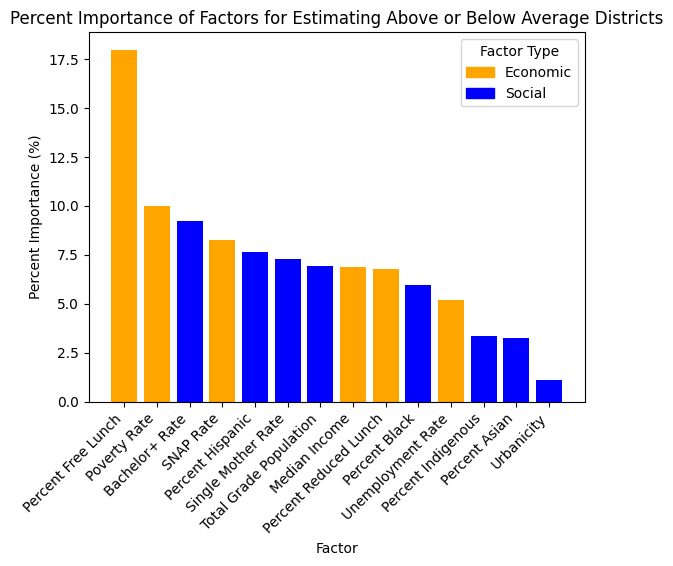

In [59]:
import matplotlib.patches as mpatches

factors = ["Percent Free Lunch", "Poverty Rate", "Bachelor+ Rate", "SNAP Rate",
           "Percent Hispanic", "Single Mother Rate", "Total Grade Population", "Median Income",
           "Percent Reduced Lunch", "Percent Black", "Unemployment Rate", "Percent Indigenous",
           "Percent Asian", "Urbanicity"]
colors = ["orange", "orange", "blue", "orange", "blue", "blue", "blue", "orange", "orange", "blue", "orange", "blue", "blue", "blue"]

plt.title("Percent Importance of Factors for Estimating Above or Below Average Districts")
plt.xlabel("Factor")
plt.ylabel("Percent Importance (%)")
plt.xticks(rotation=45, ha='right')
plt.bar(factors, sorted["importance"] * 100, color = colors)
orange = mpatches.Patch(color = 'orange', label = 'Economic')
blue = mpatches.Patch(color = 'blue', label = 'Social')
plt.legend(handles = [orange, blue], title = "Factor Type")
plt.show()

## Takeaway
We see that the 3 most important features are the percent free lunch, poverty rate, and the bachelors degree or higher rate (BA+). Two are economic factors and one is a social factor which is heavily influenced by economic factors so it is reasonable to conclude that economic factors are most important. Plotting the factors we notice percent reduced lunch is almost twice as important as any other factors. Also notice that urbanicity has little to no effect on the scores, as well as many of the race percentages.

## Conclusion

It is difficult to look for contributors to academic success since on an individual level, the effects of the predictors can vary drastically depending on the situation. However, we believe that observing the general trends in the data can help others see which factors impact the most students. Our analysis of standardized testing scores, drawing from the SEDA dataset, sheds light on various factors affecting student  performance across demographics, location, and socioeconomic backgrounds.

The state data revealed interesting disparities in test scores among different areas of the United States. Specifically, northern states typically outperformed their southern counterparts. This finding underscores the impact of the various influences which underly the region, affecting student test taking.

Our analysis of urbanicity and its relationship to test scores revealed nuanced insights. While population density showed a weak correlation with academic performance, factors such as socioeconomic status and educational resources greatly affected student success. However, the predictive model that we have created deemed this factor to be the least important metric in predicting student success. Again, there may be underlying factors that are both correlated with the area that create this interesting difference.

Furthermore, our machine learning models highlighted the importance of socioeconomic factors, more specifically the percentage of students eligible for free lunch and the poverty rate, in predicting test scores. This underscores the profound influence of economic conditions on academic outcomes, emphasizing the need for action to fix socioeconomic disparities in education.

In conclusion, our analysis only emphasizes the complex nature of the factors in academic success, influenced by combination of demographic, geographic, and socioeconomic factors. Our findings provide valuable insights for those seeking to promote equity in education. Moving forward, policy decisions, informed by our data and findings, are important for addressing disparities and creating more equitable education for students.